   # TRATAMIENTO Y ANÁLISIS DE BASE DE DATOS "USOS BICIMAD" vs Clima de Madrid

La base **'Bicis acumulados por día'** nos da la información desde junio de 2014 hasta diciembre de 2018. Nos brinda registros con información de fechas, *tipo de abonado*, y *cantidad de uso por abonado*. Inicialmente la idea es identificar como es el comportamiento de cada tipo de abonado por año, por mes y por día de semana. Antes de esto deberemos transformar la tabla y adaptarla a nuestras necesidades.

A continuación se cruza esta información con los datos del clima aprovechando que se analizan y manipulan en otro notebook.

## Librerías a importar

Realizamos las importaciones de las librerías que se van a utilizar. En este caso vamos a trabajar con:
    
    * Pandas
    * Pandasplot
    * Numpy
    * Seaborn
    * Matplotlib
    
 Estas librerías nos permitirán en su orden la manipulación de los datos y su posterior graficación.   

In [1]:
from datetime import date, datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## Extracción de los datos
El fichero *'bicis_usos_acumulado'* se encuentra enformato CSV por lo cual se se realizará la extracción con pandas read_csv.

In [2]:
bicis_usos = pd.read_csv('../dat/bicis_usos_acumulado por dia.csv', sep=';', index_col=False)


## Inspección de datos

En este punto revisamos el tipo de datos que tenemos, el tamaño de la tabla, cantidad de columnas y filas.

Visualizamos las primeras 5 columnas y filas de la tabla. La columna index por defecto iniciará desde 'cero'.

In [3]:
bicis_usos.head()

,DIA,Usos bicis abono anual,Usos bicis abono ocasional,Usos bicis total,Usos abono anual acumulado,Usos abono ocasional acumulado,Usos total acumulado desde inicio
0,23/06/2014,17,79,96,17,79,96
1,24/06/2014,24,48,72,41,127,168
2,25/06/2014,105,14,119,146,141,287
3,26/06/2014,120,15,135,266,156,422
4,27/06/2014,131,18,149,397,174,571


Visualizamos las últimas 5 columnas y filas de la tabla.

In [4]:
bicis_usos.tail()

,DIA,Usos bicis abono anual,Usos bicis abono ocasional,Usos bicis total,Usos abono anual acumulado,Usos abono ocasional acumulado,Usos total acumulado desde inicio
1648,27/12/2018,7282,151,7433,13248202,279743,13527945
1649,28/12/2018,7386,256,7642,13255588,279999,13535587
1650,29/12/2018,5584,250,5834,13261172,280249,13541421
1651,30/12/2018,5114,301,5415,13266286,280550,13546836
1652,31/12/2018,4718,283,5001,13271004,280833,13551837


Revisamos los diferentes tipos de datos con los que contamos, ya advertimos que la columna DIA precisa conversión a formato
fecha. Los demás datos tal cual como se encuentran nos servirán.

In [5]:
bicis_usos.dtypes

DIA                                  object
Usos bicis abono anual                int64
Usos bicis abono ocasional            int64
Usos bicis total                      int64
Usos abono anual acumulado            int64
Usos abono ocasional acumulado        int64
Usos total acumulado desde inicio     int64
dtype: object

Revisamos demás dimensiones para obtener la cantidad de filas y columnas.

In [6]:
bicis_usos.shape

(1653, 7)

Implementamos **.describe** para obtener la información relacionada con la distribución de los *datos, count, mean,std*.

In [7]:
bicis_usos.describe()

,Usos bicis abono anual,Usos bicis abono ocasional,Usos bicis total,Usos abono anual acumulado,Usos abono ocasional acumulado,Usos total acumulado desde inicio
count,1653.000000,1653.000000,1653.000000,1.653000e+03,1653.000000,1.653000e+03
mean,8028.435572,169.892922,8198.328494,5.919122e+06,126483.773745,6.045606e+06
std,3254.682257,138.050983,3299.990485,3.950482e+06,88504.447352,4.038907e+06
min,17.000000,0.000000,72.000000,1.700000e+01,79.000000,9.600000e+01
25%,5413.000000,61.000000,5525.000000,2.290500e+06,46187.000000,2.336687e+06
50%,8067.000000,148.000000,8306.000000,5.991439e+06,131358.000000,6.122797e+06
75%,10361.000000,235.000000,10567.000000,9.357290e+06,208761.000000,9.566051e+06
max,16529.000000,745.000000,16732.000000,1.327100e+07,280833.000000,1.355184e+07


## Transformación de los datos

La etapa de transformación de datos incluye:

* Cambio de etiquetas
* Transformación de tipo de datos
* Eliminación de columnas sin importancia
* Generación de nuevas columnas formuladas

Cambiamos los nombres de todas las columnas por nombres mas descriptivos y/o fáciles de manejar

In [11]:
bicis_usos.columns=['fecha', 'abono_anual', 'abono_ocasional', 'total_abonos', 'a_a_acum', 'a_o_acum', 'total_acum']
bicis_usos.head()

,fecha,abono_anual,abono_ocasional,total_abonos,a_a_acum,a_o_acum,total_acum
0,23/06/2014,17,79,96,17,79,96
1,24/06/2014,24,48,72,41,127,168
2,25/06/2014,105,14,119,146,141,287
3,26/06/2014,120,15,135,266,156,422
4,27/06/2014,131,18,149,397,174,571


### Cambio de formato de fecha

En este caso se aplicará una función apply para modificar la columna fecha la cual por defecto está en formato Object, y la necesitamos en 'datetime'.

In [12]:
def cast_date(date):
    return datetime.strptime(date, '%d/%m/%Y')

bicis_usos['fecha'] = bicis_usos.fecha.apply(cast_date)

Ahora queda en formato **Datetime**.

In [13]:
bicis_usos.dtypes

fecha              datetime64[ns]
abono_anual                 int64
abono_ocasional             int64
total_abonos                int64
a_a_acum                    int64
a_o_acum                    int64
total_acum                  int64
dtype: object

### Eliminación de columna

Usamos la función .Drop para eliminar las columnas que a nuestro modo de ver no aportan nada a nuestros intereses.

In [14]:
bicis_usos.head(1)

,fecha,abono_anual,abono_ocasional,total_abonos,a_a_acum,a_o_acum,total_acum
0,2014-06-23,17,79,96,17,79,96


In [16]:
bicis_usos.drop(bicis_usos.columns[[4,5,6]], axis=1, inplace=True)

Confirmamos eliminación de columna.

In [17]:
bicis_usos.head(1)

,fecha,abono_anual,abono_ocasional,total_abonos
0,2014-06-23,17,79,96


### Creación de nuevas columnas

A partir de la columna fecha vamos a extraer una columna con el 'año' y otra con el 'mes'. Adicionalmente vamos a generar una
función que nos cree una columna con el día de la semana. En ambos casos usaremos 'apply' con la función lambda.

Para mejor tratamiento de los datos generamos dos columnas nuevas:'ano' y 'mes' con lambda.

In [18]:
bicis_usos['ano'] = bicis_usos.apply(lambda fila: fila.fecha.year, axis = 1)
bicis_usos['mes'] = bicis_usos.apply(lambda fila: fila.fecha.month, axis = 1)

Es necesario identificar los días de la semana, por lo que incorporamos la función 'get_day_of_week' en linea con apply.
En el mismo proceso creamos una nueva columna la cual llamaremos *'dia_semana'*.

In [19]:
def get_day_of_week(row):    
    day = row.fecha.weekday()
    if day == 0:
        return 'Lunes'
    elif day == 1:
        return 'Martes'
    elif day == 2:
        return 'Miércoles'
    elif day == 3:
        return 'Jueves'
    elif day == 4:
        return 'Viernes'
    elif day == 5:
        return 'Sabádo'
    elif day == 6:
        return 'Domingo'
    
bicis_usos['dia_semana'] = bicis_usos.apply( get_day_of_week, axis = 1)
    
bicis_usos.head()

,fecha,abono_anual,abono_ocasional,total_abonos,ano,mes,dia_semana
0,2014-06-23,17,79,96,2014,6,Lunes
1,2014-06-24,24,48,72,2014,6,Martes
2,2014-06-25,105,14,119,2014,6,Miércoles
3,2014-06-26,120,15,135,2014,6,Jueves
4,2014-06-27,131,18,149,2014,6,Viernes


Con el fin de obtener un vista de los datos que nos permita generar otras opciones de gráficas y análisis,
aplicamos la función MELT

Reasignamos nombres nuevamente a las columnas de la nueva versión de la tabla.

In [20]:
bicis_usos_melt = pd.melt(bicis_usos, id_vars=["ano", "mes", "dia_semana"], value_vars=['abono_anual', 'abono_ocasional'], )
bicis_usos_melt.columns = ['ano', 'mes', 'dia_semana', 'tipo_usuario', 'cantidad_usos']
bicis_usos_melt.head()

,ano,mes,dia_semana,tipo_usuario,cantidad_usos
0,2014,6,Lunes,abono_anual,17
1,2014,6,Martes,abono_anual,24
2,2014,6,Miércoles,abono_anual,105
3,2014,6,Jueves,abono_anual,120
4,2014,6,Viernes,abono_anual,131


## Gráficas

In [21]:
%matplotlib inline

In [22]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 14, 10
sns.set_context('talk') #Ampliación de gráficas

Los datos obtenidos cuentan con pocas variables categóricas, razón por la cual optamos inicialmente por mostrar dos gráficas que contienen el nivel de uso de los tipos de usuarios como lo es el *Usuario de abono anual* y el *Usuario de abono ocasional*, que además manejan frecuencias de usos muy distintas, por lo tanto es mejor trabajar cada tipo de usuario por separado para poder visualizar a mejor escala los comportamientos de cada uno.

Con esta gráfica tipo **lineplot** podemos ver por separado las diferencias de escala en los desempeños por año de cada tipo de usuario.

C:\Users\alejo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


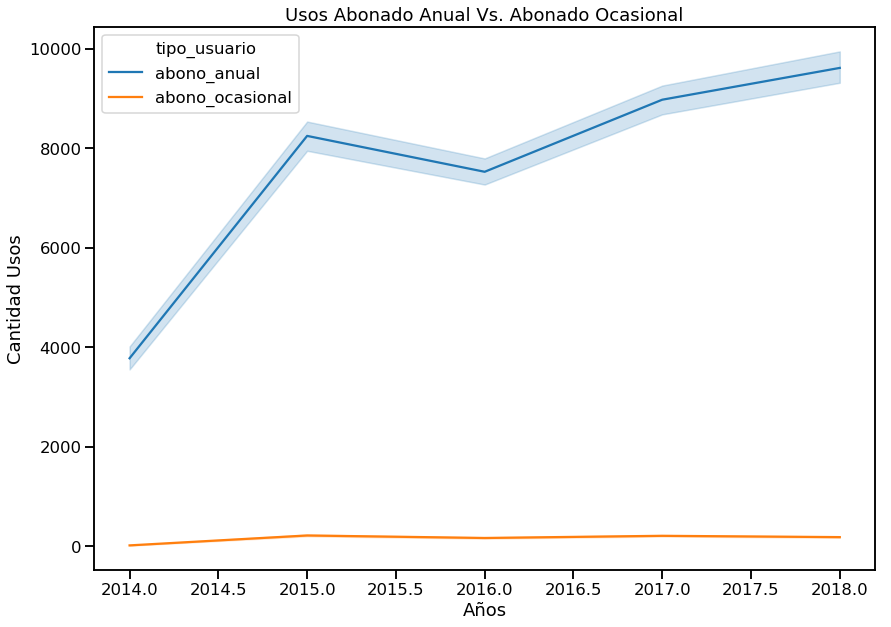

In [23]:
out = sns.lineplot(data=bicis_usos_melt, x='ano', y='cantidad_usos', hue='tipo_usuario')

plt.xlabel('Años')
plt.ylabel('Cantidad Usos')
plt.title('Usos Abonado Anual Vs. Abonado Ocasional')
plt.show()

Otra vision con Catplot retratanto la diferencia de escalas de cada tipo de usuario pero en una sola gráfica.

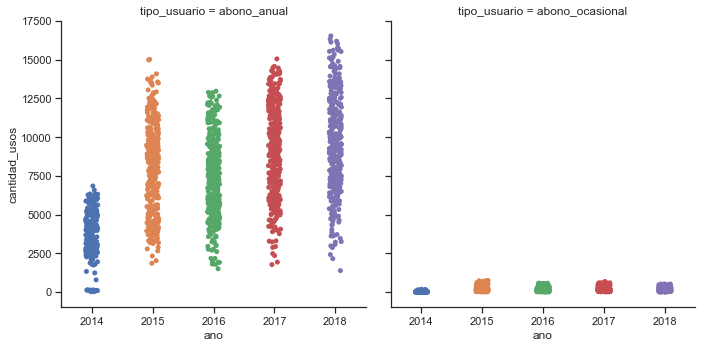

In [24]:
sns.set(style="ticks")
out = sns.catplot(x="ano", y="cantidad_usos", col="tipo_usuario", data=bicis_usos_melt)


****GRÁFICAS DE ESCALA ANUAL****

Con esta gráfica **Boxplot** por *Uso Total* observamos la relación de la variable de **'usos'** con la variable **'año'**. En otras palabras como el sistema aumenta anualmente su nivel de demanda. En junio de 2014 se inician actividades y rápidamente pasa de 7.000 usos aprox. a 15.000 usos en 2015. En 2016 se presenta una disminución y en los siguientes años retoma nuevamente la senda creciente. Podemos observar también que no se presentan datos átipicos importantes y además como en el 3er cuartil se van concentrando para los últimos 2 años una demanda de 8000 a 11000 usos por año.

* En 2016 se presenta la municipalización del sistema, que en su transición deja por fuera por concepto de mantenimiento mas de 1000 bicicletas. Además de una deserción de mas de 4.000 abonados, esto atribuible al incertidumbre generada por la operación de compra del ayuntamiento. fuente=  https://www.elmundo.es/madrid/2017/09/02/59a996ba22601d99558b463e.html

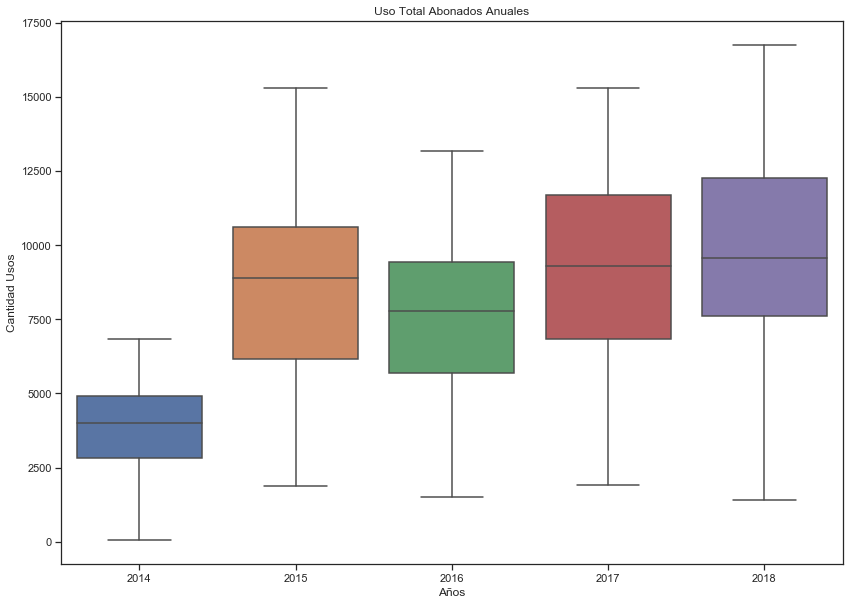

In [25]:
out = sns.boxplot(x="ano", y="total_abonos" , data=bicis_usos)
plt.xlabel('Años')
plt.ylabel('Cantidad Usos')
plt.title('Uso Total Abonados Anuales')
plt.show()

El siguiente análisis lo aplicamos con una gráfica tipo **Lineplot** y en ella podemos observar de forma individualizada el comportamiento de los **Abonados Anuales** durante los 5 años: un arranque el primer año que en menos de 6 meses obtiene aprox 6.000 usos, aumenta a mas de 8.000 usos en 2015 y en 2016 cae para reponerse nuevamente a partir de 2017.

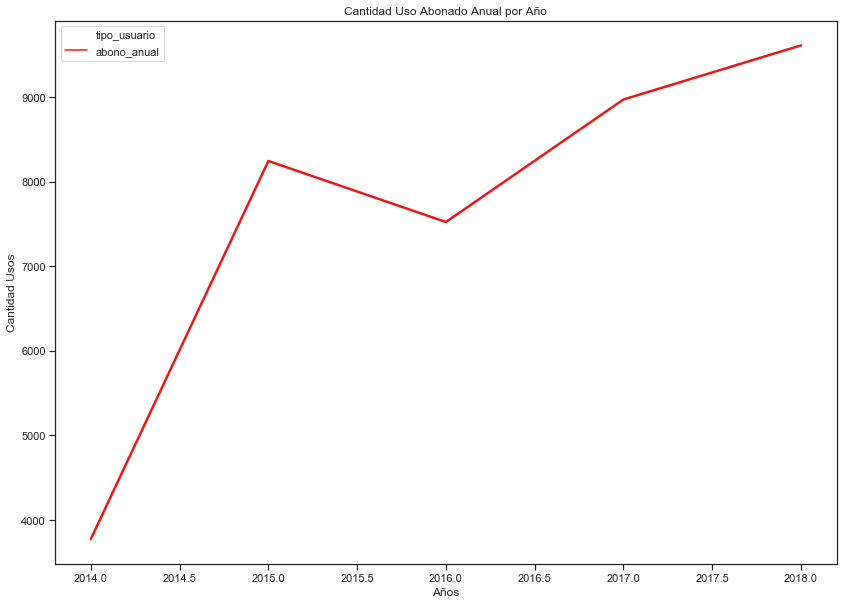

In [26]:
out = sns.lineplot(data=bicis_usos_melt[(bicis_usos_melt.tipo_usuario=='abono_anual')] , x='ano',
                   y='cantidad_usos', hue='tipo_usuario', ci=0, err_style='bars',palette="Set1",
                   linewidth=2.5, legend='full')

plt.xlabel('Años')
plt.ylabel('Cantidad Usos')
plt.title('Cantidad Uso Abonado Anual por Año')
plt.show()

Ahora para completar el analisis de la relación de las variables de *Cantidad de uso* por *Año*, observamos a través de otro **lineplot**, pero en este caso aplicado a los **Abonados ocasionales**, que el comportamiento tiene una tendencia parecida a los **Abonados Anuales** al principio. Que aunque la escala es totalmente diferente, podemos ver el mismo ascenso el primer y segundo año, para caer nuevamente en 2016, pero a diferencia del otro tipo de usuario, este no mantiene un ascenso en 2017 y 2018, sino que se mantiene estable entre los 175 y 200 usos anuales. 
Revisando la baja demanda de estos abonados, se obtiene información que el sistema está enfocado en los abonados anuales, entendiendo que estos realemte hacen parte del sistema multimodal que quiere implementar el ayuntamiendo, dandole al sistema un caracter de transporte complementario y no potenciar p.e, el uso del sistema por el turismo.

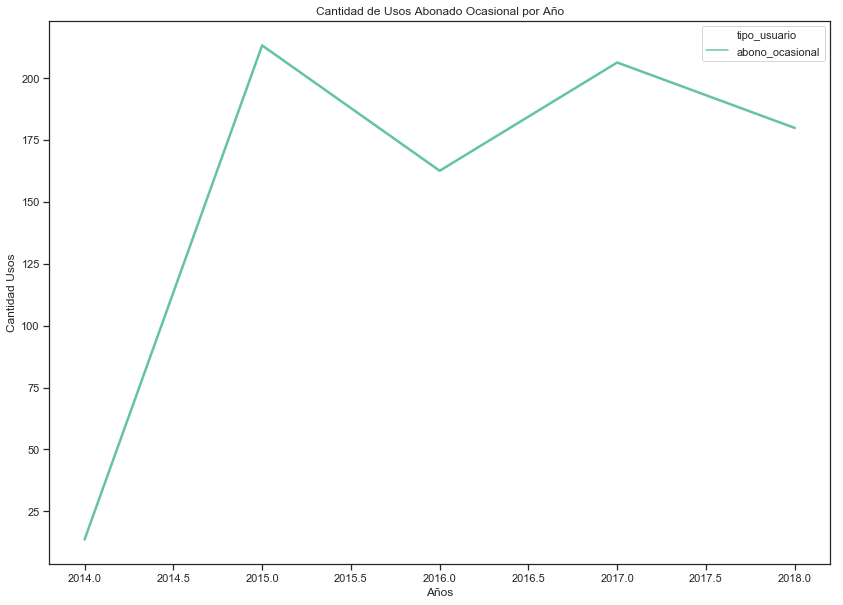

In [27]:
out = sns.lineplot(data=bicis_usos_melt[(bicis_usos_melt.tipo_usuario=='abono_ocasional')] , x='ano',
                   y='cantidad_usos', hue='tipo_usuario', ci=0, err_style='bars',palette="Set2",
                   linewidth=2.5, legend='full')

plt.xlabel('Años')
plt.ylabel('Cantidad Usos')
plt.title('Cantidad de Usos Abonado Ocasional por Año')
plt.show()

****GRAFICAS DE ESCALA DIARIA****

***MEDIA DE USO ABONADOS ANUALES POR DÍA DE LA SEMANA***
A continuación un ***Barplot***. 
Esta gráfica contiene la media de los usos por días de los 5 años que tiene de vigencia el sistema.
Vemos como la usabilidad los **Abonados Anuales** tiene un comportamiento intenso durante los días hábiles, especialmente entre martes y jueves. Este desempeño contrasta con el de los **Abonados Ocasionales** que veremos a continuación.

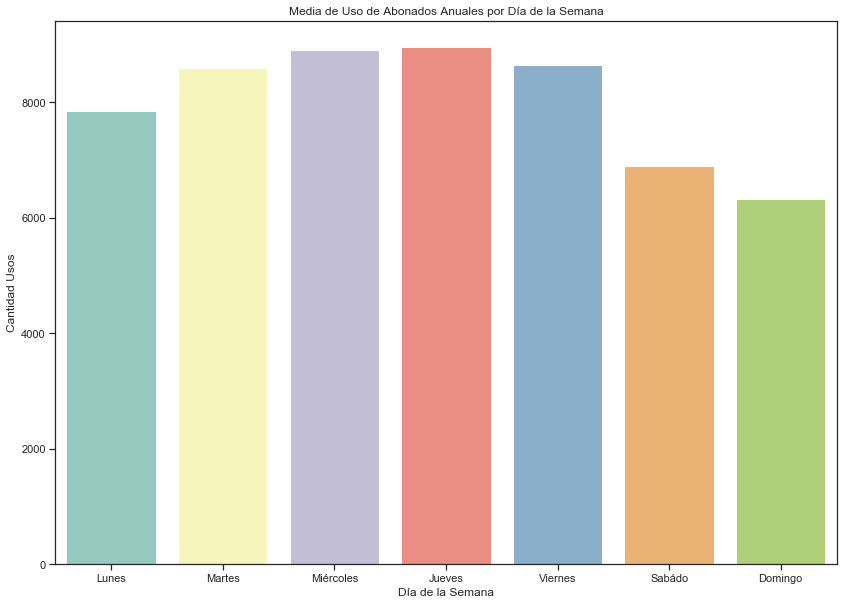

In [28]:
sns.barplot(x='dia_semana', y='abono_anual', estimator=np.mean, data=bicis_usos, palette="Set3", ci=0)
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Usos')
plt.title('Media de Uso de Abonados Anuales por Día de la Semana')
plt.show()

En la siguiente gráfica **Barplot** podemos observar el comportamiento de la media de uso por día de la semana de los **Abonados Ocasionales**. Claramente los fines de semana es cuando aumenta el uso por parte de este tipo de usuario, que puede ser asociado al turismo. Tener claro este comportamiento es fundamental, aunque las cifras puedan parecer muy bajas, sí que se detecta una tendencia que podría ser explotada mas adelante con ofertas adaptadas a estos días.

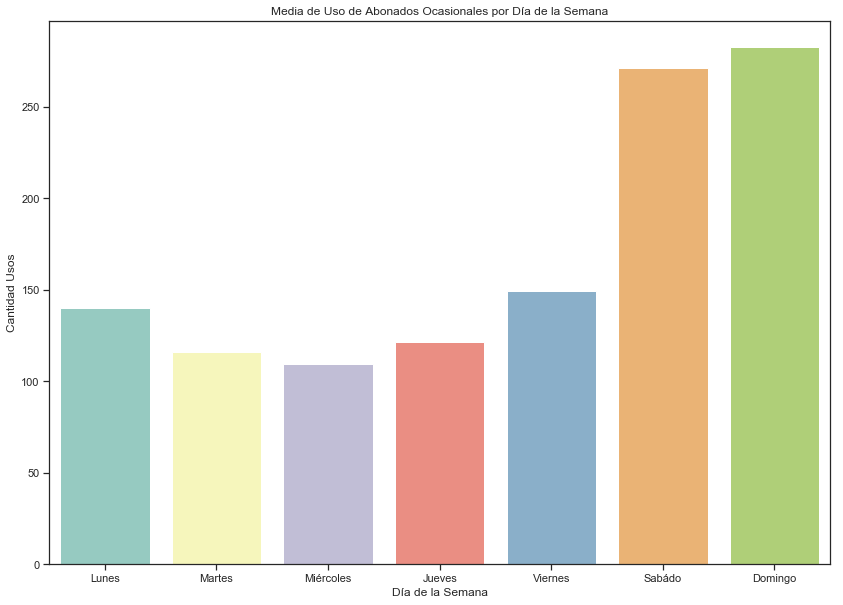

In [29]:
sns.barplot(x='dia_semana', y='abono_ocasional', estimator= np.mean, data=bicis_usos,palette="Set3", ci=0)
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Usos')
plt.title('Media de Uso de Abonados Ocasionales por Día de la Semana')
plt.show()

****GRAFICAS DE ESCALA MENSUAL****

Para continuar con el análisis del comportamiento por **Mes** de los usuarios con **Abono Anual** usaremos gráficas tipo **Pointplot** que son ideales para puntualizar cortes. En ese caso observamos como el segundo trimestre presenta siempre subas en su comportamiento, también en los meses de *Agosto* y *Septiembre* se presentan aumentos todos los años. Y para cerrar las bajas que se presentan son siempre para verano (Agosto principalmente) y los meses de *Diciembre*  a *Marzo*, fácilmente atribuíble a épocas de vacaciones y las bajas temperaturas del invierno, respectivamente.

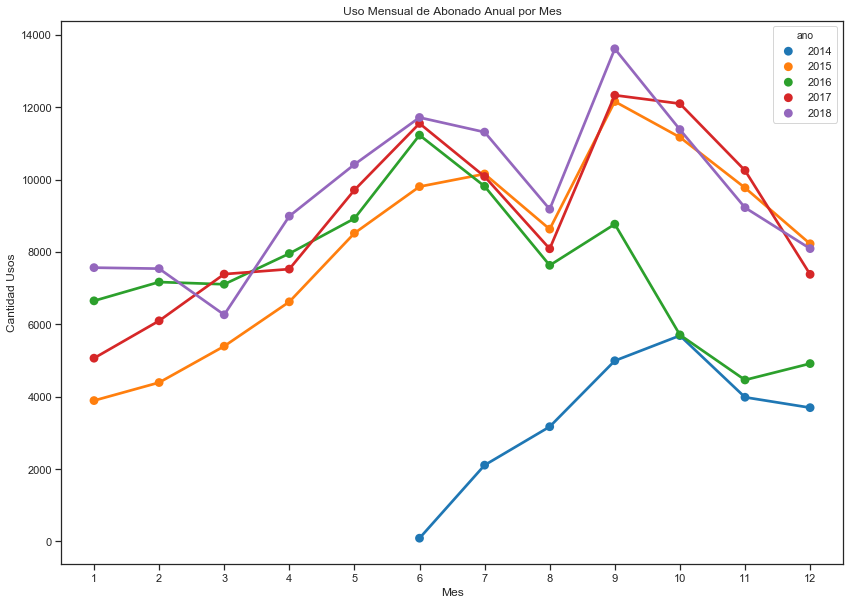

In [31]:
out = sns.pointplot(data=bicis_usos_melt[bicis_usos_melt.tipo_usuario=='abono_anual'],x='mes',
                   y='cantidad_usos', hue='ano', ci=0, err_style='bars',palette="tab10",
                   linewidth=2.5, legend='full')

plt.xlabel('Mes')
plt.ylabel('Cantidad Usos')
plt.title('Uso Mensual de Abonado Anual por Mes')
plt.show()

En el caso de los **Abonados Ocasionales** los meses de *mayo, junio, septiembre y octubre* son los momentos de mayor demanda del sistema. Igualmente con caídas muy pronunciadas desde *diciembre* hasta comienzos de *marzo*. 

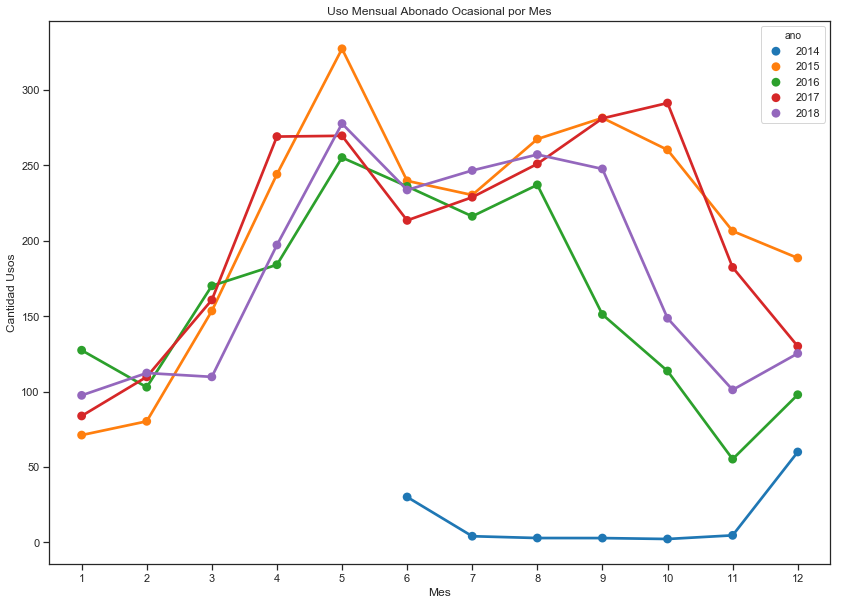

In [32]:
out = sns.pointplot(data=bicis_usos_melt[bicis_usos_melt.tipo_usuario=='abono_ocasional'],x='mes',
                   y='cantidad_usos', hue='ano', ci=0, err_style='bars',palette="tab10",
                   linewidth=2.5, legend='full')

plt.xlabel('Mes')
plt.ylabel('Cantidad Usos')
plt.title('Uso Mensual Abonado Ocasional por Mes')
plt.show()

****CRUCE DE TABLAS (Merge)****

Para darle mas profundidad y contexto a la información sobre el uso de las bicicletas hemos optado por realizar cruces con el clima, entonces podremos ver la relación de los días de lluvia y la temperatura con el uso del sistema

Importamos una tabla del clima la cual trabajamos en otro *Notebook*. (**Clima Madrid.ipynb**)

In [33]:
clima= pd.read_csv('../dat/all_weather_data.csv', sep=',', index_col=False)
clima.head()

,Unnamed: 0,date,hour_temp_max,hour_temp_min,precipitation,temp_max,temp_media,temp_min,wind_speed,wind_speed_max
0,0,2015-01-01,13:30:00,05:20:00,0.0,10.4,4.7,-1.0,0.8,3.9
1,1,2015-01-02,15:10:00,07:20:00,0.0,12.0,5.5,-1.0,0.6,3.9
2,2,2015-01-03,14:50:00,08:10:00,0.0,11.4,6.3,1.2,0.3,3.6
3,3,2015-01-04,13:15:00,08:10:00,0.0,14.0,7.7,1.4,0.3,3.3
4,4,2015-01-05,15:20:00,07:10:00,0.0,12.0,6.8,1.5,1.4,5.3


Esta tabla también amerita modificar el formato de la fecha, para lo cual aplicamos función *datetime.strptime*.

In [34]:
def cast_date(date):
    return datetime.strptime(date, '%Y-%m-%d')

clima['date'] = clima.date.apply(cast_date)

Ahora implementamos la función *merge* para cruzar la tabla clima con la tabla usos. Tabla que llamaremos **climabicis**

In [35]:
climabicis=bicis_usos.merge(clima, left_on='fecha', right_on='date')
climabicis.head()

,fecha,abono_anual,abono_ocasional,total_abonos,ano,mes,dia_semana,Unnamed: 0,date,hour_temp_max,hour_temp_min,precipitation,temp_max,temp_media,temp_min,wind_speed,wind_speed_max
0,2015-01-01,2018,149,2167,2015,1,Jueves,0,2015-01-01,13:30:00,05:20:00,0.0,10.4,4.7,-1.0,0.8,3.9
1,2015-01-02,2880,153,3033,2015,1,Viernes,1,2015-01-02,15:10:00,07:20:00,0.0,12.0,5.5,-1.0,0.6,3.9
2,2015-01-03,3187,170,3357,2015,1,Sabádo,2,2015-01-03,14:50:00,08:10:00,0.0,11.4,6.3,1.2,0.3,3.6
3,2015-01-04,3296,154,3450,2015,1,Domingo,3,2015-01-04,13:15:00,08:10:00,0.0,14.0,7.7,1.4,0.3,3.3
4,2015-01-05,4039,117,4156,2015,1,Lunes,4,2015-01-05,15:20:00,07:10:00,0.0,12.0,6.8,1.5,1.4,5.3


Inspeccionanamos nuevamente la tabla resultado del *merge* y además verificamos el tipo de datos obtenido.

In [36]:
climabicis.tail()

,fecha,abono_anual,abono_ocasional,total_abonos,ano,mes,dia_semana,Unnamed: 0,date,hour_temp_max,hour_temp_min,precipitation,temp_max,temp_media,temp_min,wind_speed,wind_speed_max
1456,2018-12-27,7282,151,7433,2018,12,Jueves,1456,2018-12-27,14:30:00,07:40:00,0.0,10.5,6.2,2.0,0.6,3.3
1457,2018-12-28,7386,256,7642,2018,12,Viernes,1457,2018-12-28,15:10:00,08:10:00,0.0,12.7,7.1,1.5,1.4,5.8
1458,2018-12-29,5584,250,5834,2018,12,Sabádo,1458,2018-12-29,15:10:00,07:15:00,0.0,11.9,8.0,4.0,1.7,7.8
1459,2018-12-30,5114,301,5415,2018,12,Domingo,1459,2018-12-30,14:50:00,06:30:00,0.0,14.2,8.7,3.2,1.1,7.5
1460,2018-12-31,4718,283,5001,2018,12,Lunes,1460,2018-12-31,15:30:00,07:50:00,0.0,13.4,7.0,0.7,0.6,5.3


Además realizamos la eliminación de las columnas que no necesitamos, para lo que nuevamente usamos la función *Drop*.

In [37]:
climabicis.drop(climabicis.columns[[7,8,9,10,12,14,15,16]], axis=1, inplace=True)
climabicis.tail()

,fecha,abono_anual,abono_ocasional,total_abonos,ano,mes,dia_semana,precipitation,temp_media
1456,2018-12-27,7282,151,7433,2018,12,Jueves,0.0,6.2
1457,2018-12-28,7386,256,7642,2018,12,Viernes,0.0,7.1
1458,2018-12-29,5584,250,5834,2018,12,Sabádo,0.0,8.0
1459,2018-12-30,5114,301,5415,2018,12,Domingo,0.0,8.7
1460,2018-12-31,4718,283,5001,2018,12,Lunes,0.0,7.0


In [38]:
climabicis.dtypes

fecha              datetime64[ns]
abono_anual                 int64
abono_ocasional             int64
total_abonos                int64
ano                         int64
mes                         int64
dia_semana                 object
precipitation             float64
temp_media                float64
dtype: object

Ahora solo falta convertir las columnas tipo float como **'abono_anual'**, **'Abono_ocasional'** y **'Año'** entre otros a números enteros(int). Para esto aplicamos función **lambda** por cada columna.

In [39]:
climabicis['ano']= climabicis.apply(lambda fila: int(fila['ano']), axis=1)
climabicis['abono_anual']= climabicis.apply(lambda fila: int(fila['abono_anual']), axis=1)
climabicis['abono_ocasional']= climabicis.apply(lambda fila: int(fila['abono_ocasional']), axis=1)
climabicis['total_abonos']= climabicis.apply(lambda fila: int(fila['total_abonos']), axis=1)
climabicis['mes']= climabicis.apply(lambda fila: int(fila['mes']), axis=1)

Confirmamos el cambio de tipo y ya quedó listo para trabajar con gráficas.

In [40]:
climabicis.dtypes

fecha              datetime64[ns]
abono_anual                 int64
abono_ocasional             int64
total_abonos                int64
ano                         int64
mes                         int64
dia_semana                 object
precipitation             float64
temp_media                float64
dtype: object

En esta gráfica detectamos claramente que si cruzamos el uso total del sistema con la temperatura encontraremos una relación directa: a mayor temperatura, mayor uso de bicicletas. Sin embargo, cuando la media de la temperatura supera los 25 grados, ya afecta negativamente el uso del sistema. Es entre 20 y 25 la condición ideal de temperatura para el uso del sistema. Lo que habíamos confirmado antes con el uso por mes, donde en los meses de invierno reflejan una gran disminución de usos.  

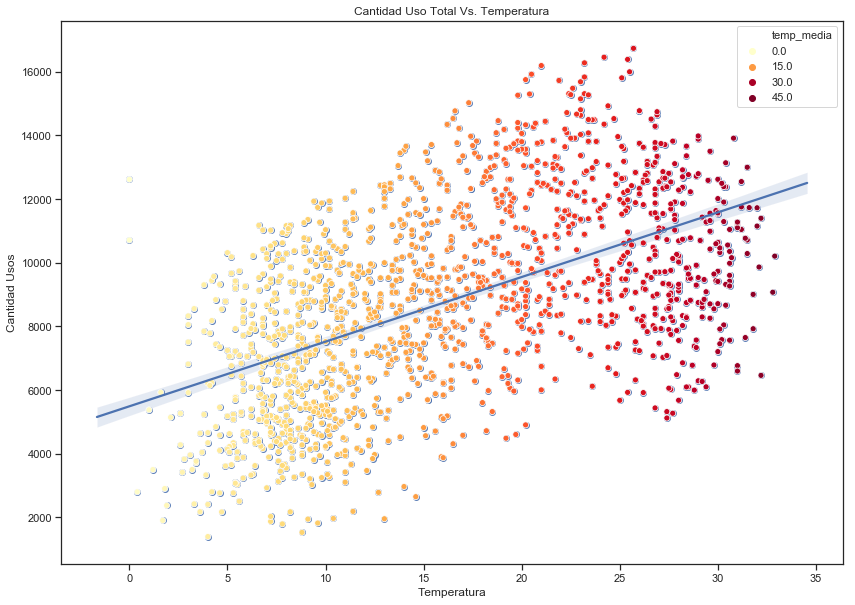

In [41]:
out = sns.regplot(x='temp_media', y='total_abonos', data=climabicis )
out = sns.scatterplot(x='temp_media', y='total_abonos', data=climabicis , hue='temp_media', palette='YlOrRd')

plt.xlabel('Temperatura')
plt.ylabel('Cantidad Usos')
plt.title('Cantidad Uso Total Vs. Temperatura')
plt.show()

Para revisar la relación entre la lluvia y el uso de bicicletas del sistema, podemos ver que que esta variable no afecta directamente el sistema. Los días que hubo 'cero' lluvias, evidentemente hay uso del sistema, pero los días que llovió no se ve tan afectado dicho uso. Realmente llueve poco en Madrid y cuando sucede, no es impedimento. 

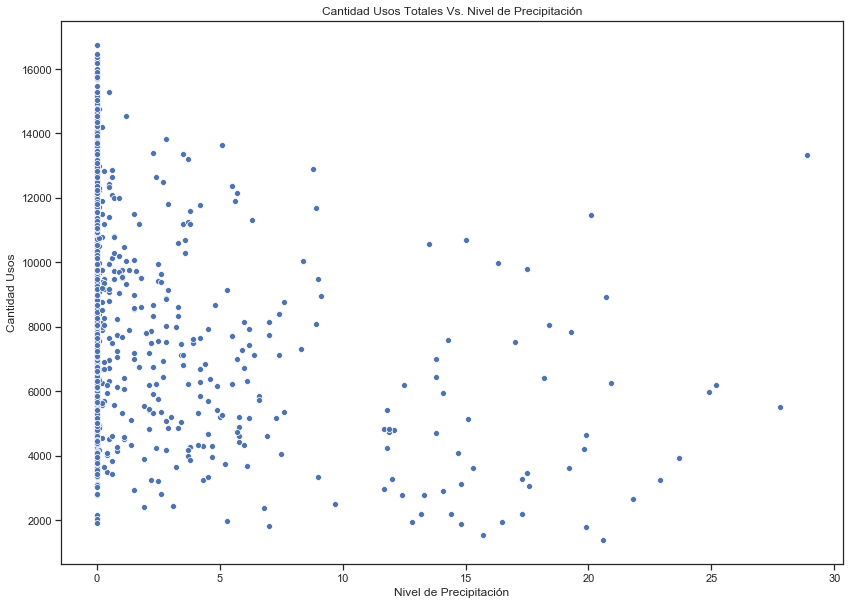

In [42]:
out = sns.scatterplot(x='precipitation', y='total_abonos', data=climabicis, palette="BuGn")

plt.xlabel('Nivel de Precipitación')
plt.ylabel('Cantidad Usos')
plt.title('Cantidad Usos Totales Vs. Nivel de Precipitación')
plt.show()